# Heart failure prediction 
In this notebook you will be looking into the heart disease dataset presented here: <br>
https://www.kaggle.com/fedesoriano/heart-failure-prediction <br>
<br>
There are a lot of code snippets for you available. Pls be aware that some of the snippets need your attention to be completed (encoding). 
Additionally I added some questions that should help you explore the dataset. All these questions can be answered with the functions presented in the iris example. Feel free to explore the data beyond these questions. Pandas is widely used library, such that there is lot of information on additional functions e. g. on https://pandas.pydata.org/ or stackoverflow. The same is also true for sklearn. 

Questions:
1. What is the overall prevalence for heart disease? Compare it to the sample
2. What is the ratio of sexes in the sample?
3. How does the cholesterol level compare to the average population?
4. How often do exercise induced anginas occure in the sample?
5. How do the distributions for all variables look like?
6. Look at the correlation between age (cholosterol/blood pressure/heart rate) and and heart disease
7. Plot the histograms for all variables for female and male -> What are the difference?
8. Plot the histograms for all variables in three different age brackets -> What are the difference

At the end we would like to use a random forest model to predict the heart disease. Look at the confusion matrix for various hyperparameters. Could you imagine what implications could be on the choice of hyperparameters?

In [1]:
!pip install --upgrade pip
!pip install pandas
!pip install scikit-learn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import preprocessing

plt.rcParams['figure.figsize'] = [15, 10]
pd.set_option('display.max_rows', None)

In [3]:
from IPython.display import Image
from IPython.display import display

In [4]:
df = pd.read_csv('data/heart.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [7]:
# get column names
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [8]:
# get all unique values in the selected column
df['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [9]:
#integer encoding
le = preprocessing.LabelEncoder()
df['sex_encoded'] = le.fit_transform(df['Sex'].values)
print(dict(zip(le.classes_, le.transform(le.classes_))))
df['painType_encoded'] = le.fit_transform(df['ChestPainType'].values)
print(dict(zip(le.classes_, le.transform(le.classes_))))
df['ecg_encoded'] = le.fit_transform(df['RestingECG'].values)
print(dict(zip(le.classes_, le.transform(le.classes_))))
# ExerciseAngina is still missing pls also transform it
# ST_Slope is still missing pls also transform it
df['slope_encoded'] = le.fit_transform(df['ST_Slope'].values)
print(dict(zip(le.classes_, le.transform(le.classes_))))
df['exAngina_encoded'] = le.fit_transform(df['ExerciseAngina'].values)
print(dict(zip(le.classes_, le.transform(le.classes_))))

{'F': 0, 'M': 1}
{'ASY': 0, 'ATA': 1, 'NAP': 2, 'TA': 3}
{'LVH': 0, 'Normal': 1, 'ST': 2}
{'Down': 0, 'Flat': 1, 'Up': 2}
{'N': 0, 'Y': 1}


In [10]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,sex_encoded,painType_encoded,ecg_encoded,slope_encoded,exAngina_encoded
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377,0.789760,0.781046,0.989107,1.361656,0.404139
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414,0.407701,0.956519,0.631671,0.607056,0.490992
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000,1.000000,3.000000,2.000000,2.000000,1.000000


### 1. Global prevalence
https://en.wikipedia.org/wiki/Cardiovascular_disease <br>
Cardiovascular diseases are the leading cause of death worldwide except Africa.[2] Together CVD resulted in 17.9 million deaths (32.1%) in 2015, up from 12.3 million (25.8%) in 1990.[4][3] Deaths, at a given age, from CVD are more common and have been increasing in much of the developing world, while rates have declined in most of the developed world since the 1970s.[12][13] Coronary artery disease and stroke account for 80% of CVD deaths in males and 75% of CVD deaths in females.[2] Most cardiovascular disease affects older adults. In the United States 11% of people between 20 and 40 have CVD, while 37% between 40 and 60, 71% of people between 60 and 80, and 85% of people over 80 have CVD.[1] The average age of death from coronary artery disease in the developed world is around 80 while it is around 68 in the developing world.[12] Diagnosis of disease typically occurs seven to ten years earlier in men as compared to women.[2]: 48 <br>

In the sample we have about 55% of people that experienced a cardiovascular event with an average age of 53 yr.

### 2. Sex
About of 78% of people in the sample are male. Which is much higher than in the global population.

### 3. Cholesterol
https://en.wikipedia.org/wiki/Cholesterol#Clinical_significance <br>
In the overall sample the level of cholesterol is below the risk level. As visible by the quantiles about 50% have a borderline risk and about 25% are at high risk with the maximum at 600 mg/dL.

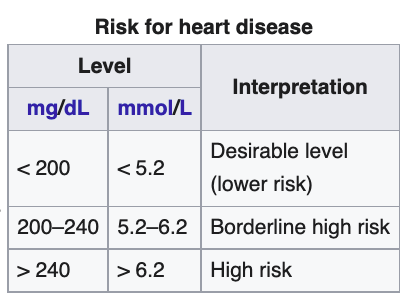

In [11]:
Image(filename='images/cholesterol.png')

### 4. Exercise induced anginas occure in the sample?
About 40% of ppl in the samples experience an exercise induced angina.


### Blood pressure
https://en.wikipedia.org/wiki/Blood_pressure <br>
The average blood pressure is at the high normal with only 25% in the hypertension regime with greatly enhanced risks for cardiovascular disease. 

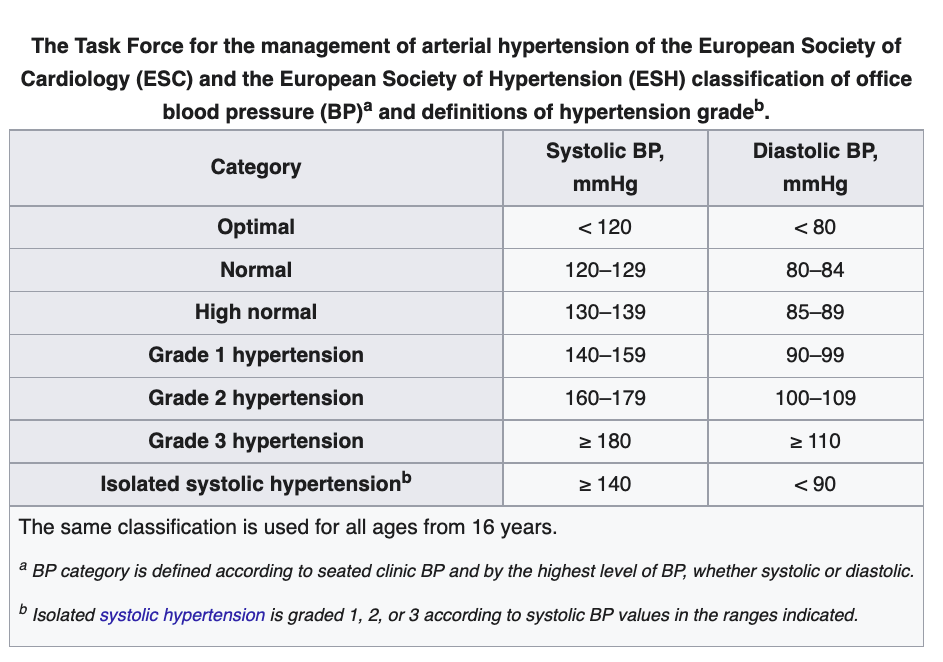

In [12]:
Image(filename='images/blood_pressure.png')

In [13]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,sex_encoded,painType_encoded,ecg_encoded,slope_encoded,exAngina_encoded
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,1,1,1,2,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,0,2,1,1,0
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,1,1,2,2,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0,0,1,1,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,1,2,1,2,0


### 5. Distributions

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'RestingBP'}>,
        <AxesSubplot:title={'center':'Cholesterol'}>],
       [<AxesSubplot:title={'center':'FastingBS'}>,
        <AxesSubplot:title={'center':'MaxHR'}>,
        <AxesSubplot:title={'center':'Oldpeak'}>],
       [<AxesSubplot:title={'center':'HeartDisease'}>,
        <AxesSubplot:title={'center':'sex_encoded'}>,
        <AxesSubplot:title={'center':'painType_encoded'}>],
       [<AxesSubplot:title={'center':'ecg_encoded'}>,
        <AxesSubplot:title={'center':'slope_encoded'}>,
        <AxesSubplot:title={'center':'exAngina_encoded'}>]], dtype=object)

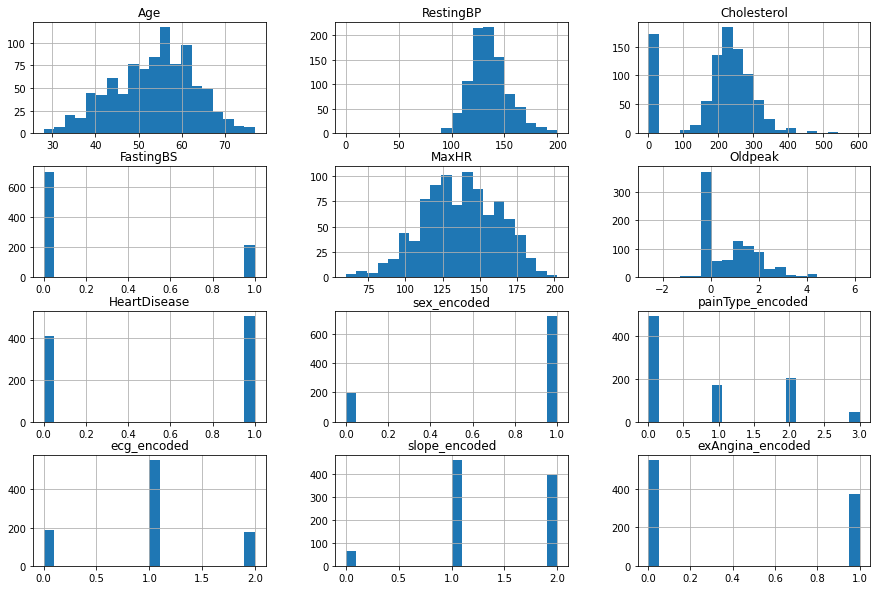

In [14]:
df.hist(bins=20)

<AxesSubplot:title={'center':'Age'}, xlabel='RestingECG'>

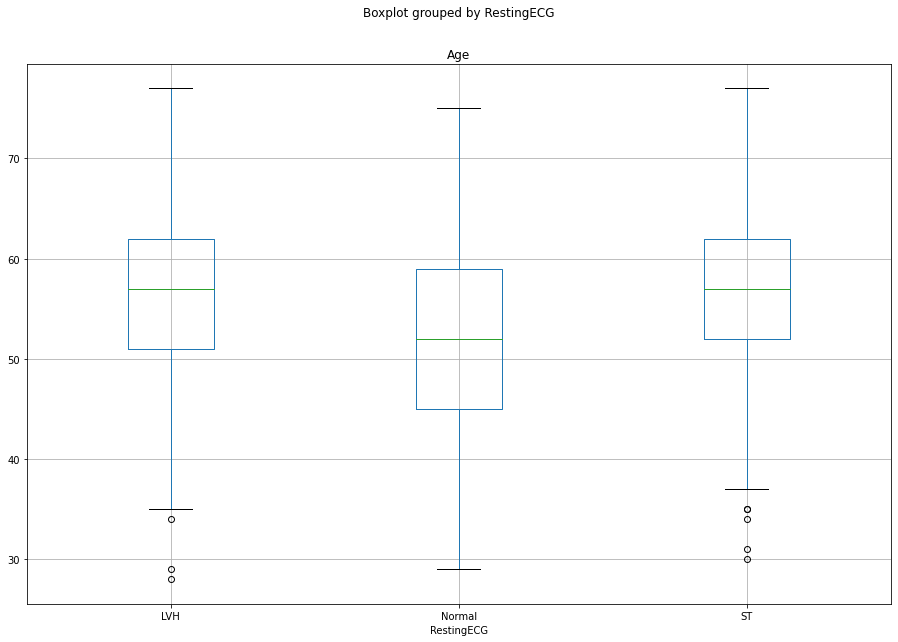

In [15]:
df.boxplot(column=['Age'], by='RestingECG') #, 'RestingBP', 'Cholesterol', 'MaxHR'])

<AxesSubplot:title={'center':'RestingBP'}, xlabel='ST_Slope'>

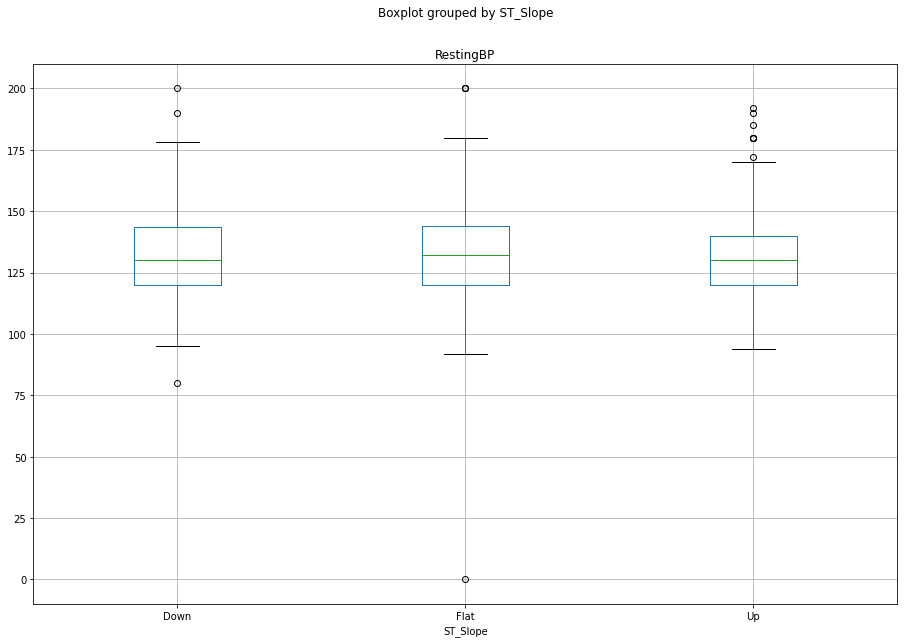

In [16]:
df.boxplot(column=['RestingBP'], by='ST_Slope')

<AxesSubplot:title={'center':'Cholesterol'}, xlabel='ChestPainType'>

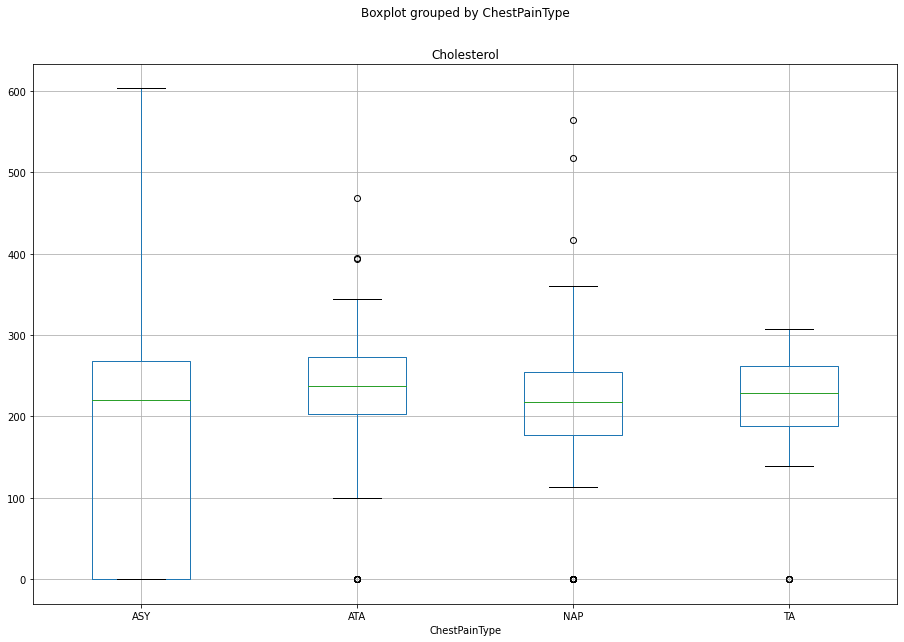

In [17]:
df.boxplot(column=['Cholesterol'], by='ChestPainType')

<AxesSubplot:title={'center':'MaxHR'}, xlabel='FastingBS'>

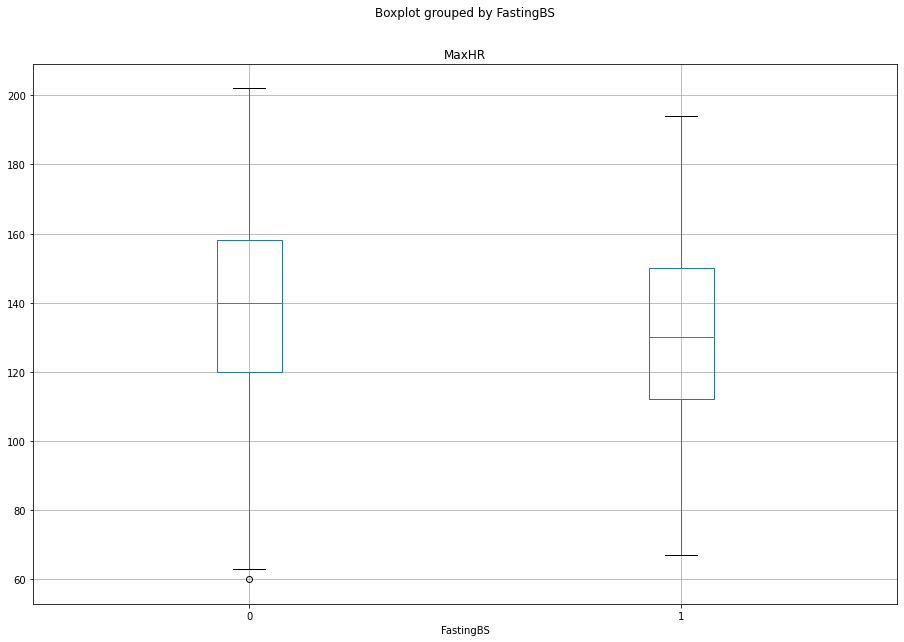

In [18]:
df.boxplot(column=['MaxHR'], by='FastingBS')

### 6. Look at the correlation between age (cholosterol/blood pressure/heart rate) and and heart disease

<AxesSubplot:xlabel='Age', ylabel='Cholesterol'>

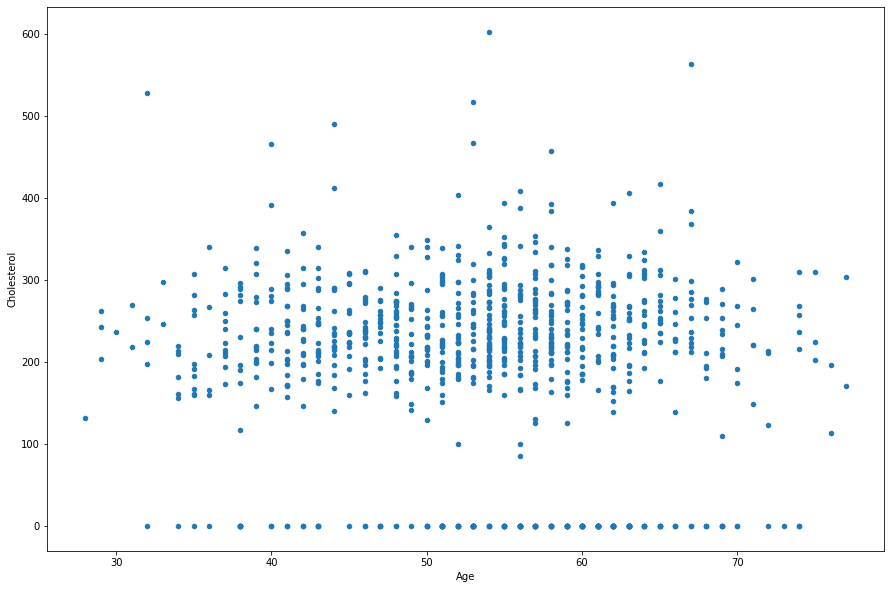

In [19]:
df.plot.scatter(x='Age', y='Cholesterol')

<AxesSubplot:title={'center':'Age'}, xlabel='HeartDisease'>

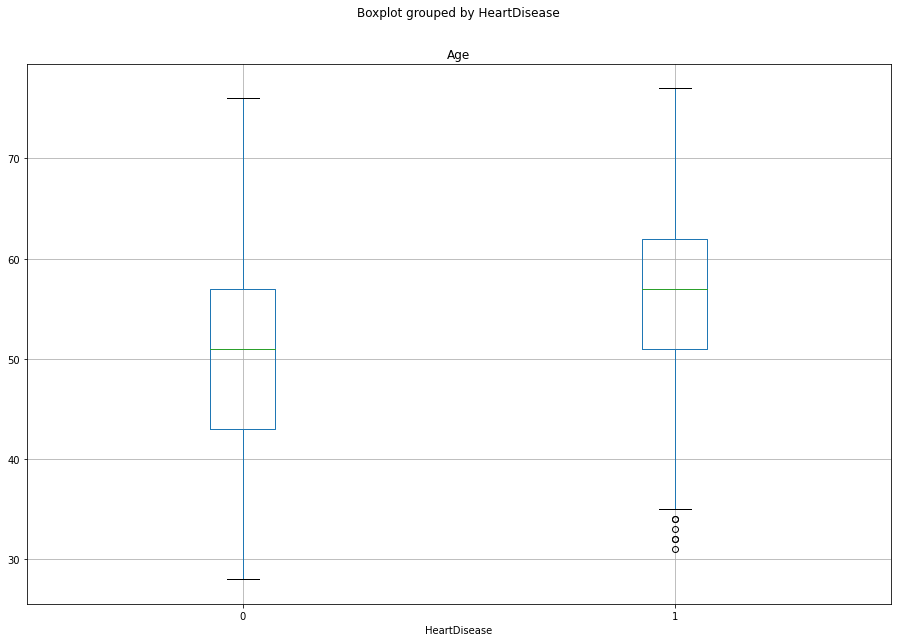

In [20]:
df.boxplot(column=['Age'], by='HeartDisease')

<AxesSubplot:title={'center':'Cholesterol'}, xlabel='HeartDisease'>

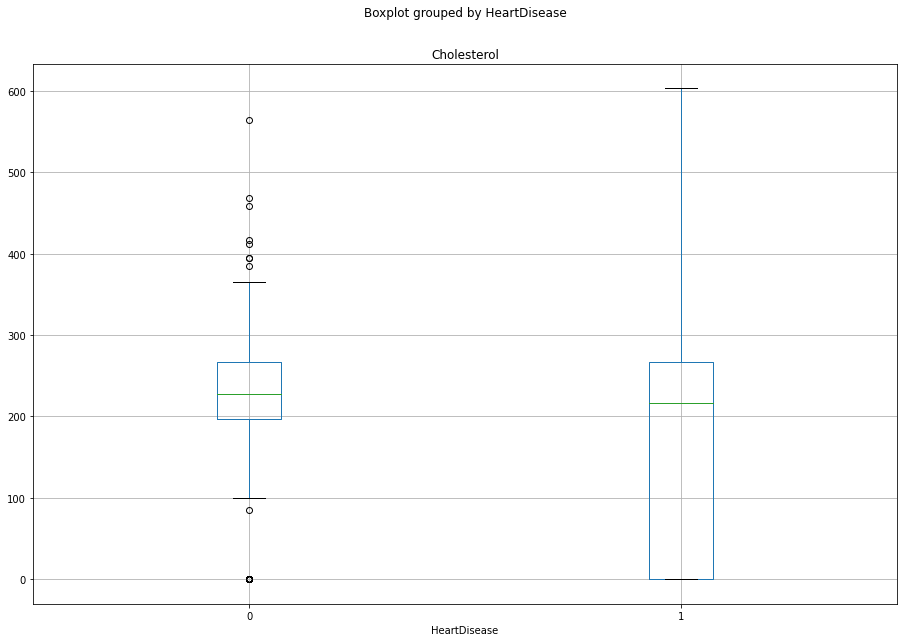

In [21]:
df.boxplot(column=['Cholesterol'], by='HeartDisease')

<AxesSubplot:title={'center':'MaxHR'}, xlabel='HeartDisease'>

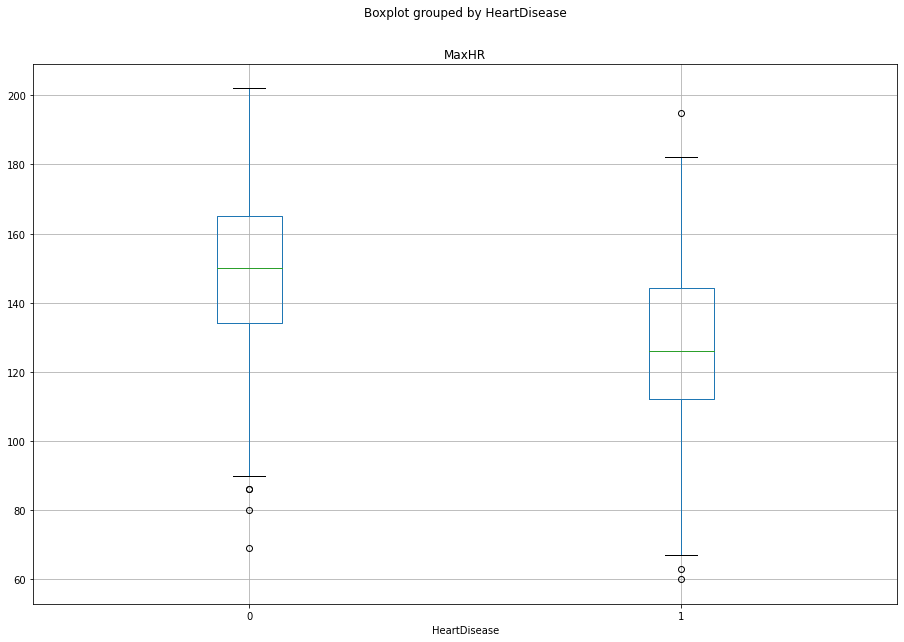

In [22]:
df.boxplot(column=['MaxHR'], by='HeartDisease')

### 7. What are the difference between female and male
- Men are a bit older then women in the sample. 
- There are much more male represented. 
- The heart rate is on average a bit higher for women. 
- Women have much higher colesterol
- The pain type is significantly different

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'RestingBP'}>,
        <AxesSubplot:title={'center':'Cholesterol'}>],
       [<AxesSubplot:title={'center':'FastingBS'}>,
        <AxesSubplot:title={'center':'MaxHR'}>,
        <AxesSubplot:title={'center':'Oldpeak'}>],
       [<AxesSubplot:title={'center':'HeartDisease'}>,
        <AxesSubplot:title={'center':'sex_encoded'}>,
        <AxesSubplot:title={'center':'painType_encoded'}>],
       [<AxesSubplot:title={'center':'ecg_encoded'}>,
        <AxesSubplot:title={'center':'slope_encoded'}>,
        <AxesSubplot:title={'center':'exAngina_encoded'}>]], dtype=object)

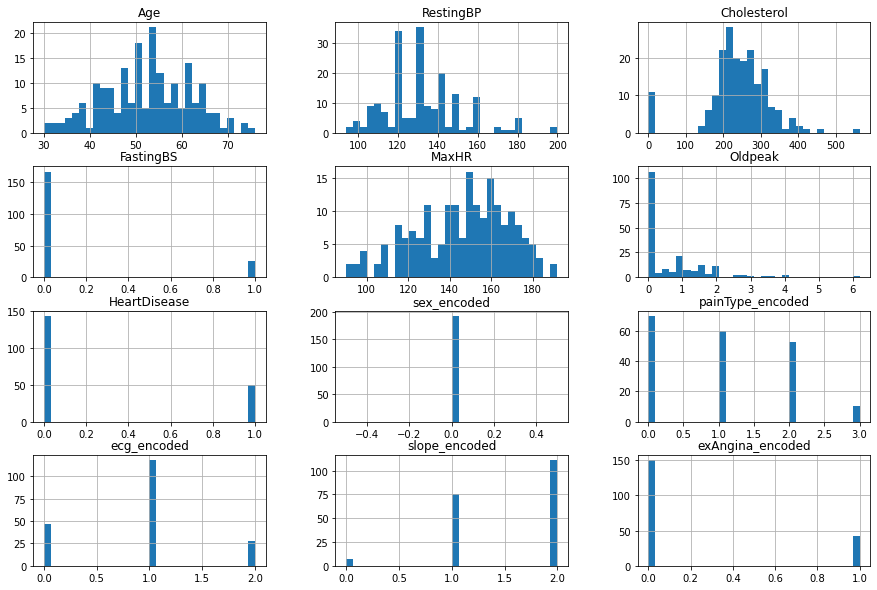

In [23]:
female = df[df['Sex']=='F']
female.hist(bins=30)

In [24]:
female.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,sex_encoded,painType_encoded,ecg_encoded,slope_encoded,exAngina_encoded
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.0,193.000000,193.000000,193.000000,193.000000
mean,52.492228,132.212435,241.196891,0.134715,146.139896,0.668912,0.259067,0.0,1.015544,0.901554,1.538860,0.222798
std,9.517593,19.392638,85.195441,0.342307,22.154902,0.956865,0.439262,0.0,0.921258,0.617157,0.568068,0.417206
min,30.000000,94.000000,0.000000,0.000000,90.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,46.000000,120.000000,204.000000,0.000000,130.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,0.000000
50%,53.000000,130.000000,243.000000,0.000000,150.000000,0.000000,0.000000,0.0,1.000000,1.000000,2.000000,0.000000
75%,60.000000,140.000000,288.000000,0.000000,163.000000,1.100000,1.000000,0.0,2.000000,1.000000,2.000000,0.000000
max,76.000000,200.000000,564.000000,1.000000,192.000000,6.200000,1.000000,0.0,3.000000,2.000000,2.000000,1.000000


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'RestingBP'}>,
        <AxesSubplot:title={'center':'Cholesterol'}>],
       [<AxesSubplot:title={'center':'FastingBS'}>,
        <AxesSubplot:title={'center':'MaxHR'}>,
        <AxesSubplot:title={'center':'Oldpeak'}>],
       [<AxesSubplot:title={'center':'HeartDisease'}>,
        <AxesSubplot:title={'center':'sex_encoded'}>,
        <AxesSubplot:title={'center':'painType_encoded'}>],
       [<AxesSubplot:title={'center':'ecg_encoded'}>,
        <AxesSubplot:title={'center':'slope_encoded'}>,
        <AxesSubplot:title={'center':'exAngina_encoded'}>]], dtype=object)

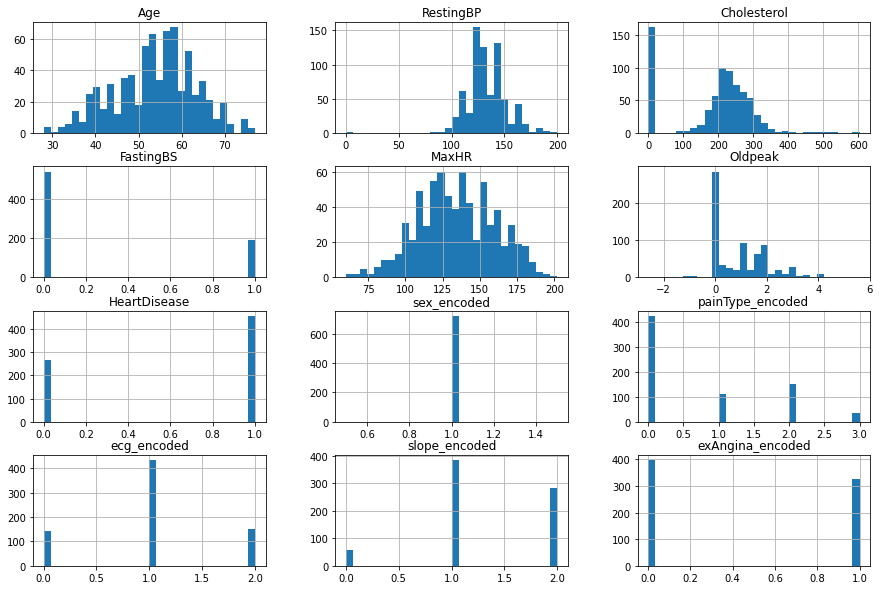

In [25]:
male = df[df['Sex']=='M']
male.hist(bins=30)

In [26]:
male.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,sex_encoded,painType_encoded,ecg_encoded,slope_encoded,exAngina_encoded
count,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,725.0,725.000000,725.000000,725.000000,725.000000
mean,53.782069,132.445517,187.513103,0.259310,134.325517,0.945517,0.631724,1.0,0.718621,1.012414,1.314483,0.452414
std,9.397864,18.286739,112.351444,0.438559,25.719191,1.087154,0.482670,0.0,0.956656,0.633861,0.608751,0.498074
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000
25%,47.000000,120.000000,156.000000,0.000000,117.000000,0.000000,0.000000,1.0,0.000000,1.000000,1.000000,0.000000
50%,55.000000,130.000000,219.000000,0.000000,134.000000,0.800000,1.000000,1.0,0.000000,1.000000,1.000000,0.000000
75%,60.000000,140.000000,261.000000,1.000000,152.000000,1.700000,1.000000,1.0,2.000000,1.000000,2.000000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,5.600000,1.000000,1.0,3.000000,2.000000,2.000000,1.000000


### 8. What are the difference between Age <45, [45, 60] and >60
- blood pressure rises with age
- cholesterol stays more or less the same (most likely due to not being measured)
- the heart rate goes down
- the heart diseas fraction goes up significantly
- the prevalence of angina goes up 
- the youngest group show a difference in the pain Type

In [27]:
younger = df[df['Age'] < 45]
middle = df[(df['Age'] >=45) & (df['Age']<= 60)]
older = df[df['Age']>60]

In [28]:
younger.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,sex_encoded,painType_encoded,ecg_encoded,slope_encoded,exAngina_encoded
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,39.325843,124.876404,212.775281,0.101124,154.117978,0.491573,0.325843,0.764045,0.960674,1.000000,1.612360,0.213483
std,3.775554,15.330130,96.277700,0.302343,22.918737,0.887953,0.470011,0.425792,0.922796,0.487122,0.553636,0.410922
min,28.000000,92.000000,0.000000,0.000000,80.000000,-1.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37.000000,115.750000,182.250000,0.000000,138.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
50%,40.000000,120.000000,220.000000,0.000000,155.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,0.000000
75%,42.000000,132.000000,266.750000,0.000000,172.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,0.000000
max,44.000000,190.000000,529.000000,1.000000,202.000000,3.800000,1.000000,1.000000,3.000000,2.000000,2.000000,1.000000


In [29]:
middle.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,sex_encoded,painType_encoded,ecg_encoded,slope_encoded,exAngina_encoded
count,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000
mean,53.379576,132.603083,201.639692,0.236994,135.924855,0.868208,0.556840,0.795761,0.737958,0.980732,1.369942,0.420039
std,4.280742,18.779159,106.674057,0.425649,24.075976,1.035309,0.497238,0.403533,0.915717,0.630326,0.587796,0.494041
min,45.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50.000000,120.000000,182.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
50%,54.000000,130.000000,224.000000,0.000000,138.000000,0.600000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
75%,57.000000,140.000000,266.000000,0.000000,155.000000,1.500000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000
max,60.000000,200.000000,603.000000,1.000000,195.000000,5.600000,1.000000,1.000000,3.000000,2.000000,2.000000,1.000000


In [30]:
older.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,sex_encoded,painType_encoded,ecg_encoded,slope_encoded,exAngina_encoded
count,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000
mean,65.244344,137.968326,180.873303,0.330317,124.945701,1.251131,0.728507,0.796380,0.737557,1.000000,1.140271,0.520362
std,3.886343,18.228447,122.967927,0.471395,22.997564,1.150202,0.445739,0.403604,1.059113,0.732369,0.612935,0.500719
min,61.000000,95.000000,0.000000,0.000000,67.000000,-0.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,62.000000,125.000000,0.000000,0.000000,110.000000,0.100000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,64.000000,140.000000,220.000000,0.000000,125.000000,1.200000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
75%,67.000000,150.000000,269.000000,1.000000,141.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000
max,77.000000,200.000000,564.000000,1.000000,179.000000,6.200000,1.000000,1.000000,3.000000,2.000000,2.000000,1.000000


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'RestingBP'}>,
        <AxesSubplot:title={'center':'Cholesterol'}>],
       [<AxesSubplot:title={'center':'FastingBS'}>,
        <AxesSubplot:title={'center':'MaxHR'}>,
        <AxesSubplot:title={'center':'Oldpeak'}>],
       [<AxesSubplot:title={'center':'HeartDisease'}>,
        <AxesSubplot:title={'center':'sex_encoded'}>,
        <AxesSubplot:title={'center':'painType_encoded'}>],
       [<AxesSubplot:title={'center':'ecg_encoded'}>,
        <AxesSubplot:title={'center':'slope_encoded'}>,
        <AxesSubplot:title={'center':'exAngina_encoded'}>]], dtype=object)

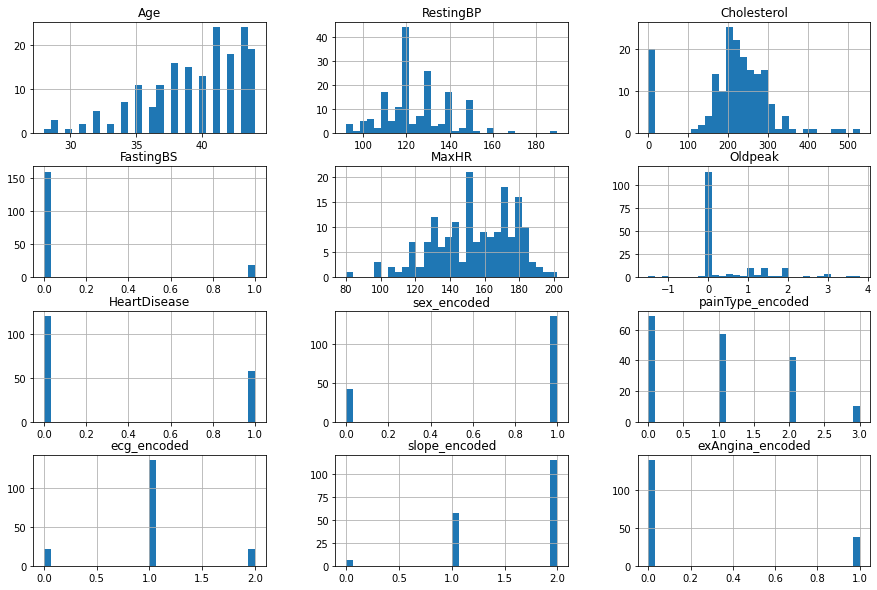

In [31]:
younger.hist(bins=30)

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'RestingBP'}>,
        <AxesSubplot:title={'center':'Cholesterol'}>],
       [<AxesSubplot:title={'center':'FastingBS'}>,
        <AxesSubplot:title={'center':'MaxHR'}>,
        <AxesSubplot:title={'center':'Oldpeak'}>],
       [<AxesSubplot:title={'center':'HeartDisease'}>,
        <AxesSubplot:title={'center':'sex_encoded'}>,
        <AxesSubplot:title={'center':'painType_encoded'}>],
       [<AxesSubplot:title={'center':'ecg_encoded'}>,
        <AxesSubplot:title={'center':'slope_encoded'}>,
        <AxesSubplot:title={'center':'exAngina_encoded'}>]], dtype=object)

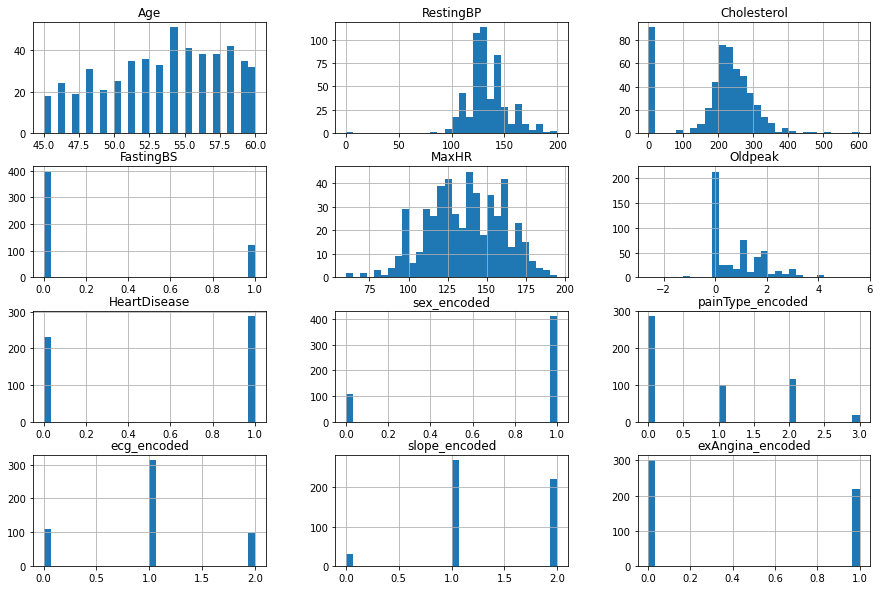

In [32]:
middle.hist(bins=30)

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'RestingBP'}>,
        <AxesSubplot:title={'center':'Cholesterol'}>],
       [<AxesSubplot:title={'center':'FastingBS'}>,
        <AxesSubplot:title={'center':'MaxHR'}>,
        <AxesSubplot:title={'center':'Oldpeak'}>],
       [<AxesSubplot:title={'center':'HeartDisease'}>,
        <AxesSubplot:title={'center':'sex_encoded'}>,
        <AxesSubplot:title={'center':'painType_encoded'}>],
       [<AxesSubplot:title={'center':'ecg_encoded'}>,
        <AxesSubplot:title={'center':'slope_encoded'}>,
        <AxesSubplot:title={'center':'exAngina_encoded'}>]], dtype=object)

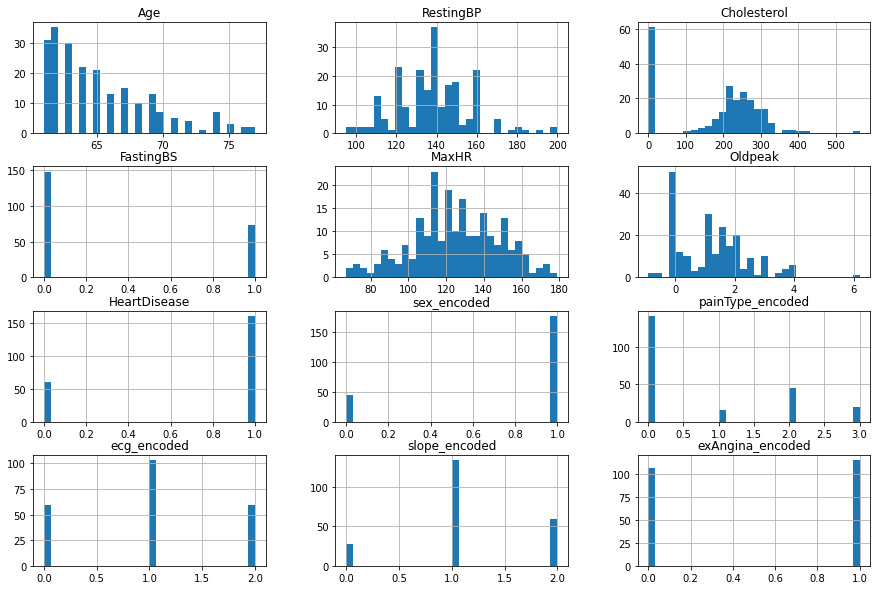

In [33]:
older.hist(bins=30)

## Random Forest 

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [35]:
rnd_classifier = RandomForestClassifier(n_estimators=10, criterion='gini', 
                                        max_depth=None, max_features='auto', max_leaf_nodes=None, 
                                        min_impurity_decrease=0.0, bootstrap=True, 
                                        n_jobs=None, random_state=None, verbose=0)


In [36]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease', 'sex_encoded', 'painType_encoded', 'ecg_encoded',
       'slope_encoded', 'exAngina_encoded'],
      dtype='object')

In [37]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,sex_encoded,painType_encoded,ecg_encoded,slope_encoded,exAngina_encoded
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,1,1,1,2,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,0,2,1,1,0
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,1,1,2,2,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0,0,1,1,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,1,2,1,2,0


In [39]:
X = df[['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 
       'sex_encoded', 'painType_encoded', 'ecg_encoded',
        'slope_encoded', 'exAngina_encoded']]
Y = df['HeartDisease']

In [40]:
rnd_classifier.fit(X, Y)

RandomForestClassifier(n_estimators=10)

In [41]:
rnd_prediction = rnd_classifier.predict(X)
rnd_confusion = confusion_matrix(y_true=Y, y_pred=rnd_prediction)
print(rnd_confusion)

[[408   2]
 [  8 500]]


# Don't train and test with the same data!

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
rnd_classifier.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=10)

In [44]:
rnd_prediction = rnd_classifier.predict(X_test)
rnd_confusion = confusion_matrix(y_true=Y_test, y_pred=rnd_prediction)
print(rnd_confusion)

[[109  14]
 [ 41 139]]
